In [ ]:
!rm iris.csv
!wget https://wingated.github.io/cs180/adult.csv
!wget https://wingated.github.io/cs180/iris.csv

rm: cannot remove 'iris.csv': No such file or directory
--2022-09-23 20:07:22--  https://wingated.github.io/cs180/adult.csv
Resolving wingated.github.io (wingated.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to wingated.github.io (wingated.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974460 (3.8M) [text/csv]
Saving to: ‘adult.csv’

adult.csv           100%[===================>]   3.79M  --.-KB/s    in 0.07s   

2022-09-23 20:07:23 (54.0 MB/s) - ‘adult.csv’ saved [3974460/3974460]

--2022-09-23 20:07:23--  https://wingated.github.io/cs180/iris.csv
Resolving wingated.github.io (wingated.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to wingated.github.io (wingated.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4626 (4.5K) [text/csv]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   4.52K  -

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#plt.rcParams['figure.figsize']=(10,10)


(0.02, 0.1)

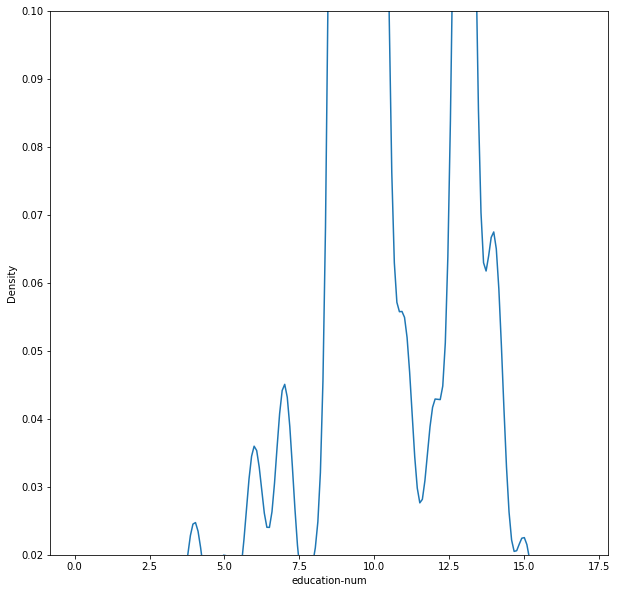

In [ ]:
adult = pd.read_csv("./adult.csv")
fig = sns.kdeplot( x=adult['education-num'])
fig.set_ylim( [0.02,0.10] )

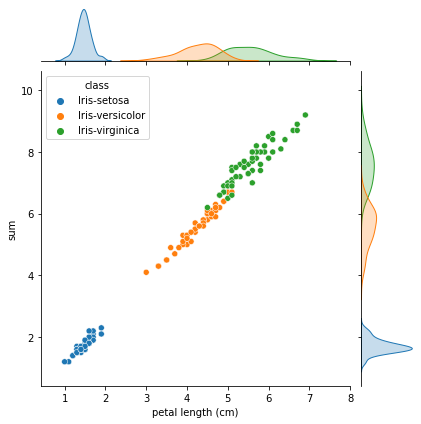

In [ ]:
sns.jointplot( data=iris, x="petal length (cm)", y="sum", hue="class")

In [ ]:
iris["sum"] = iris["petal length (cm)"] + iris["petal width (cm)"]

In [ ]:
iris['cost'] = 0.0
iris.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,sum,cost
145,6.7,3.0,5.2,2.3,Iris-virginica,7.5,0.0
146,6.3,2.5,5.0,1.9,Iris-virginica,6.9,0.0
147,6.5,3.0,5.2,2.0,Iris-virginica,7.2,0.0
148,6.2,3.4,5.4,2.3,Iris-virginica,7.7,0.0
149,5.9,3.0,5.1,1.8,Iris-virginica,6.9,0.0


## Filtering

In [ ]:
filtered = iris[ iris["sepal length (cm)"] < 5.0 ]

In [ ]:
filtered

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,sum,cost
1,4.9,3.0,1.4,0.2,Iris-setosa,1.6,0.0
2,4.7,3.2,1.3,0.2,Iris-setosa,1.5,0.0
3,4.6,3.1,1.5,0.2,Iris-setosa,1.7,0.0
6,4.6,3.4,1.4,0.3,Iris-setosa,1.7,0.0
8,4.4,2.9,1.4,0.2,Iris-setosa,1.6,0.0
9,4.9,3.1,1.5,0.1,Iris-setosa,1.6,0.0
11,4.8,3.4,1.6,0.2,Iris-setosa,1.8,0.0
12,4.8,3.0,1.4,0.1,Iris-setosa,1.5,0.0
13,4.3,3.0,1.1,0.1,Iris-setosa,1.2,0.0
22,4.6,3.6,1.0,0.2,Iris-setosa,1.2,0.0


# Grouping and aggregating

### split-apply-combine
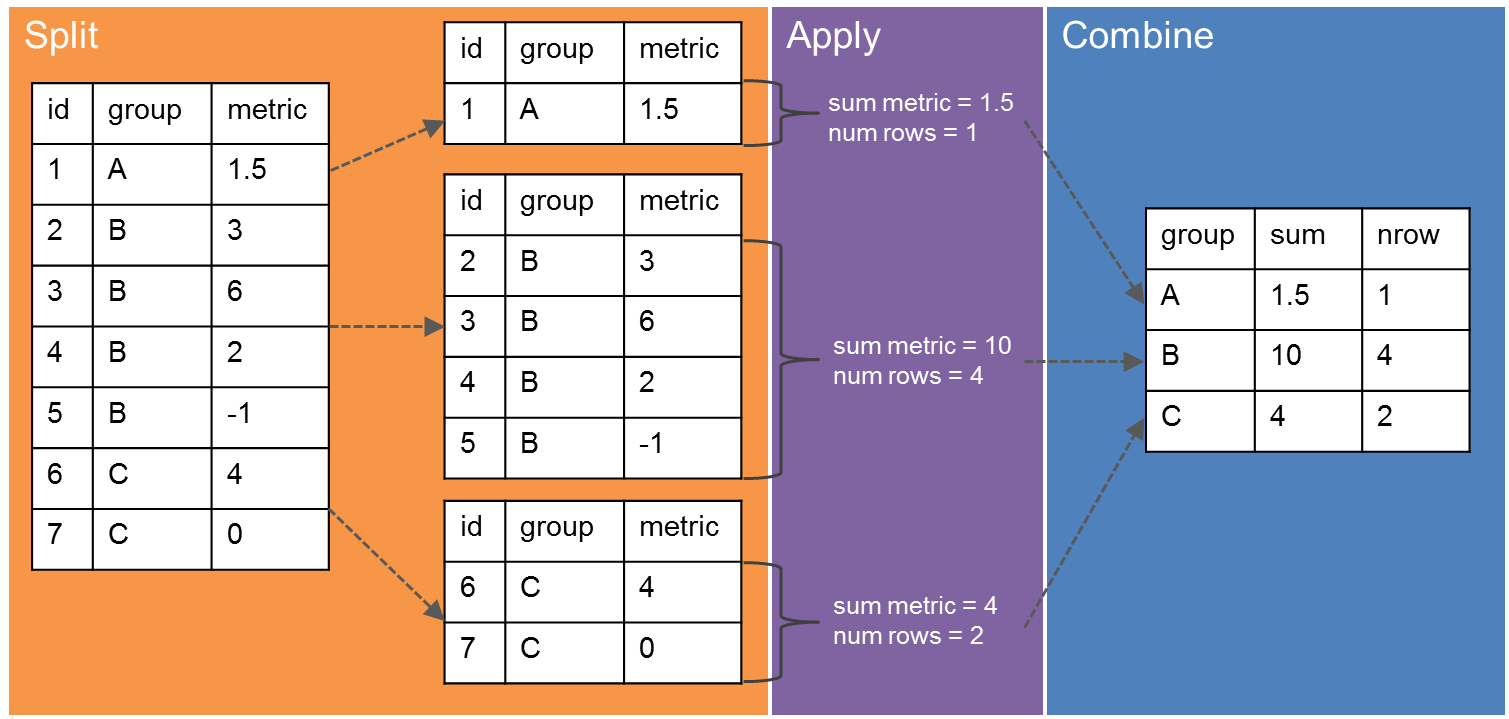

In [ ]:
groups = iris.groupby("class")

In [ ]:
for id, block in groups:
  print(id)
  print(block.shape)

Iris-setosa
(50, 7)
Iris-versicolor
(50, 7)
Iris-virginica
(50, 7)


In [ ]:
groups.mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),sum,cost
class,,,,,,
Iris-setosa,5.006,3.418,1.464,0.244,1.708,0.0
Iris-versicolor,5.936,2.770,4.260,1.326,5.586,0.0
Iris-virginica,6.588,2.974,5.552,2.026,7.578,0.0


## Joining

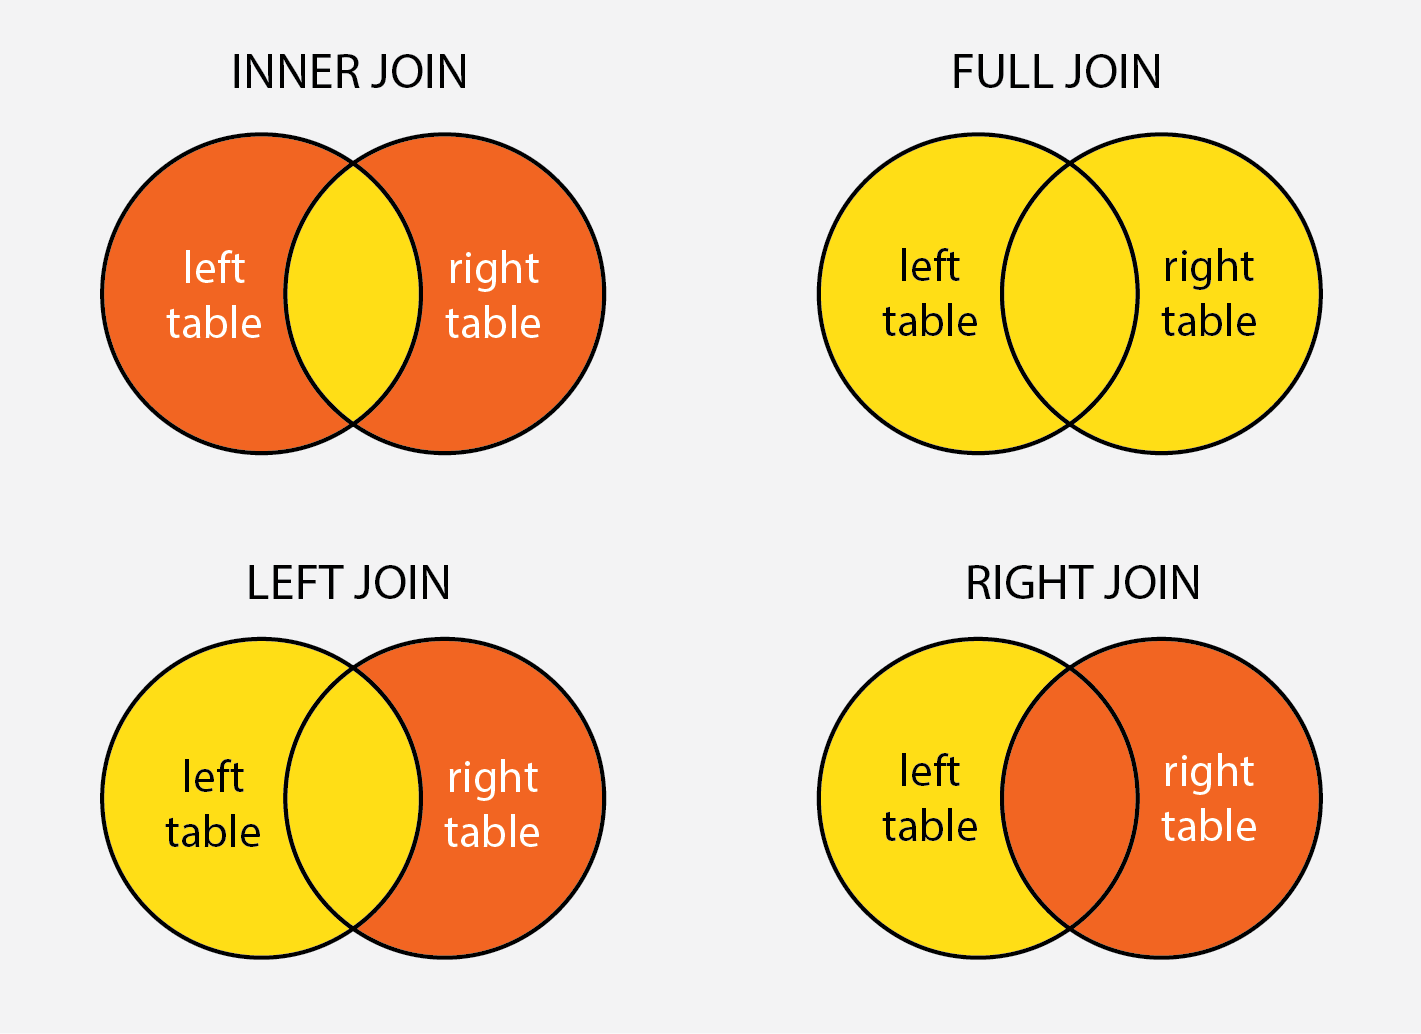

In [ ]:
iris = pd.read_csv("./iris.csv")

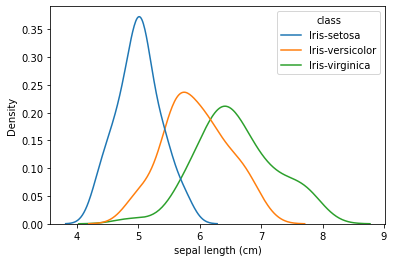

In [ ]:
sns.kdeplot( data=iris, x="sepal length (cm)", hue="class")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


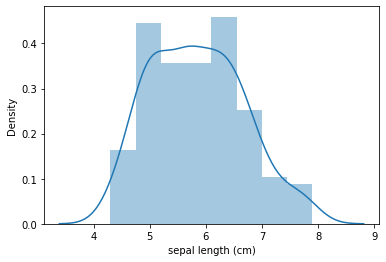

In [ ]:
sns.distplot( iris["sepal length (cm)"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


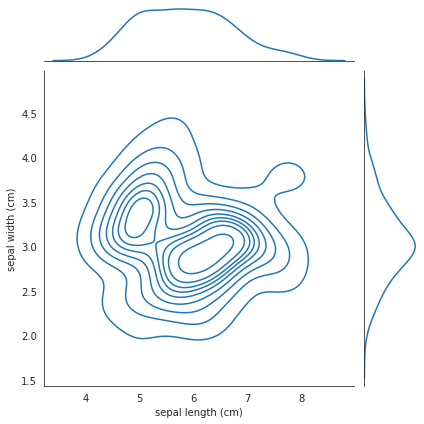

In [ ]:
with sns.axes_style("white"):
  sns.jointplot( "sepal length (cm)", "sepal width (cm)", iris, kind="kde")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


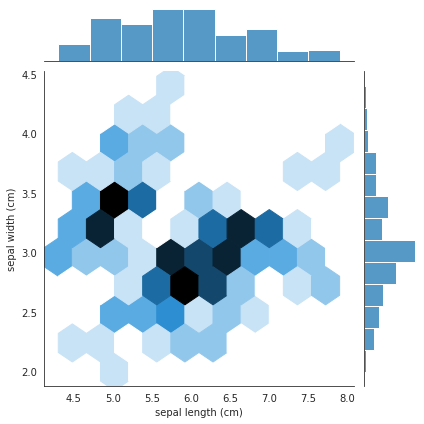

In [ ]:
with sns.axes_style("white"):
  sns.jointplot( "sepal length (cm)", "sepal width (cm)", iris, kind="hex")


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


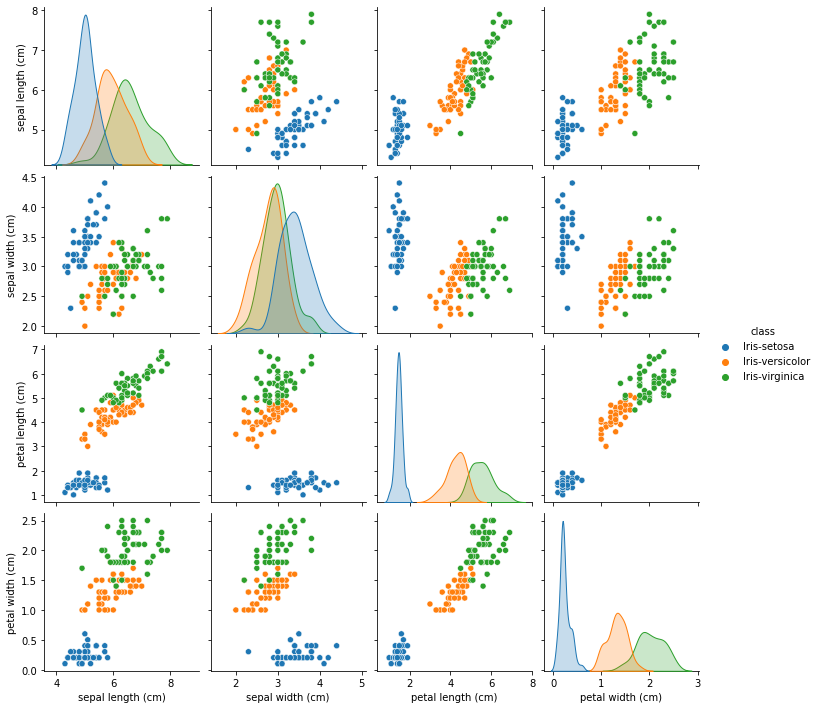

In [ ]:
sns.pairplot( iris, hue="class", size=2.5)